In [100]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del=1, mu=1)
H = myModel.HBdG()

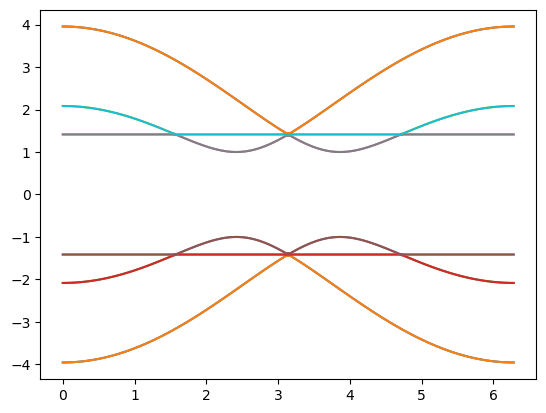

In [101]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)
energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
plt.plot(k, energies)

In [102]:
energies = myModel.solvHam(k, k)
energies

array([[-3.9568743 , -3.95549655, -3.95136488, ..., -3.95136488,
        -3.95549655, -3.9568743 ],
       [-3.9568743 , -3.95549655, -3.95136488, ..., -3.95136488,
        -3.95549655, -3.9568743 ],
       [-2.08402153, -2.0827723 , -2.0790272 , ..., -2.0790272 ,
        -2.0827723 , -2.08402153],
       ...,
       [ 2.08402153,  2.0827723 ,  2.0790272 , ...,  2.0790272 ,
         2.0827723 ,  2.08402153],
       [ 3.9568743 ,  3.95549655,  3.95136488, ...,  3.95136488,
         3.95549655,  3.9568743 ],
       [ 3.9568743 ,  3.95549655,  3.95136488, ...,  3.95136488,
         3.95549655,  3.9568743 ]])

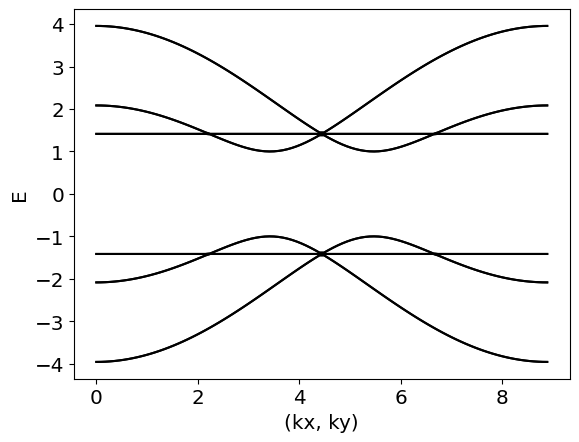

In [103]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [104]:
np.shape(energies)

(12, 100)

In [105]:
energies

array([[-3.9568743 , -3.95549655, -3.95136488, ..., -3.95136488,
        -3.95549655, -3.9568743 ],
       [-3.9568743 , -3.95549655, -3.95136488, ..., -3.95136488,
        -3.95549655, -3.9568743 ],
       [-2.08402153, -2.0827723 , -2.0790272 , ..., -2.0790272 ,
        -2.0827723 , -2.08402153],
       ...,
       [ 2.08402153,  2.0827723 ,  2.0790272 , ...,  2.0790272 ,
         2.0827723 ,  2.08402153],
       [ 3.9568743 ,  3.95549655,  3.95136488, ...,  3.95136488,
         3.95549655,  3.9568743 ],
       [ 3.9568743 ,  3.95549655,  3.95136488, ...,  3.95136488,
         3.95549655,  3.9568743 ]])

In [106]:
E = myModel.Es(k)
emax=np.amax(E)
Earr = np.linspace(-5,5,200)
emax

nan

In [107]:
E

array([[ 0.        ,  0.        ,  0.        , ..., -3.95412091,
        -3.95618551, -3.9568743 ],
       [ 0.        ,  0.        ,  0.        , ..., -3.95412091,
        -3.95618551, -3.9568743 ],
       [ 0.        ,  0.        ,  0.        , ..., -2.08152517,
        -2.08339697, -2.08402153],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  2.08152517,
         2.08339697,  2.08402153],
       [ 0.        ,  0.        ,  0.        , ...,  3.95412091,
         3.95618551,  3.9568743 ],
       [ 0.        ,  0.        ,  0.        , ...,  3.95412091,
         3.95618551,  3.9568743 ]])

In [108]:
Earr

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

In [109]:
np.shape(E)
#E

(12, 10100)

In [110]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [111]:
DOS1

array([6.72632170e-147, 5.34525285e-133, 8.78216260e-120, 2.98384473e-107,
       2.09705069e-095, 3.04956481e-084, 9.17970805e-074, 5.72246372e-064,
       7.39175200e-055, 1.97983757e-046, 1.10057381e-038, 1.27121498e-031,
       3.05557139e-025, 1.53157404e-019, 1.60550480e-014, 3.53457526e-010,
       1.64472094e-006, 1.63442371e-003, 3.53163247e-001, 1.71756578e+001,
       2.02441772e+002, 6.88130296e+002, 9.90659998e+002, 1.03304399e+003,
       1.04370614e+003, 1.06123970e+003, 1.08411372e+003, 1.11172962e+003,
       1.14438798e+003, 1.18297915e+003, 1.22905644e+003, 1.28518677e+003,
       1.35580569e+003, 1.44951108e+003, 1.58777749e+003, 1.83787695e+003,
       2.20283319e+003, 2.16267858e+003, 1.71245192e+003, 1.40228115e+003,
       1.22404390e+003, 1.09751467e+003, 9.98022113e+002, 9.15778323e+002,
       8.45612440e+002, 7.84400341e+002, 7.30091999e+002, 6.81261863e+002,
       6.36874435e+002, 5.96151238e+002, 5.58490319e+002, 5.23415005e+002,
       4.90539899e+002, 4

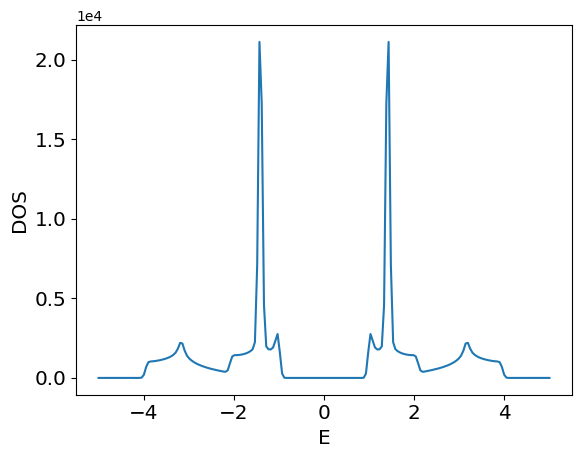

In [112]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()